In [2]:
from implicit.nearest_neighbours import bm25_weight
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
import pandas as pd
import spotipy
import sys
from tqdm import tqdm
from spotipy.oauth2 import SpotifyClientCredentials

import numpy as np
from ipynb.fs.full.Model import *
from ipynb.fs.full.Spotify_Functions import *
from ipynb.fs.full.Load_Starting_Files import *
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

In [3]:
client_id = 'e42bc8c7773341c98c22d1099ec06d9b'
client_secret = 'a1441373650e44979c617106a84352e3'

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                                client_secret=client_secret))

In [4]:
uk_data = pd.read_pickle('../cleaned_data/uk_data.pkl')
pl_data = pd.read_pickle('../cleaned_data/pl_data.pkl')
us_data = pd.read_pickle('../cleaned_data/us_data.pkl')

In [5]:
def get_valence(user_predictions):
    user_valence = {}
    #for key in list(user_predictions.keys())[:10]:
    #    user_valence[key] = []
    user_valence = []
    for prediction_set in user_predictions[703]:
        valence = []
        for track_name in list(prediction_set['trackName'])[:5]:
            track = lookup_track(spotify, track_name)
            if track != None:
                track_id = track['id']
                try:
                    track_valence = spotify.audio_features(track_id)[0]['valence']
                    valence.append(track_valence)
                except:
                    print(track_id)
        user_valence.append(np.mean(valence))

    
    return(user_valence)

def plot_valence(valences):
    for user in valences:
        plt.plot(range(len(user)), user)

# Test 1

In [6]:
sample_ids = np.append(np.random.choice(uk_data['userID'].unique(), 49, replace = False),703)
#print(sample_ids)
t_explo, a_explo, predictions, model = simulate_model(uk_data, 50,sample_ids, decay = True, n_decay = 50)

100%|███████████████████████████████████████████| 50/50 [02:07<00:00,  2.54s/it]


In [7]:
def plot_exploratoryness(track_expo, artist_expo,title,l_lim=0, h_lim= 10):

    figure, axis = plt.subplots(1, 2, figsize = (20,6), sharex = True)
    
    plt.xlabel = "Iteration"
    plt.ylabel = "Track Exploratoryness"
    axis[0].set_title("Track Exploration")
    axis[1].set_title("Number of Unique Artists")
    axis[0].set_xlabel("Set of Recommendations")
    axis[1].set_xlabel("Set of Recommendations")
    for key in list(track_expo.keys())[l_lim:h_lim]:
        #print(key)
        axis[0].plot(range(0, len(track_expo[key])*5, 5), track_expo[key])
        
        axis[1].plot(range(0, len(artist_expo[key])*5, 5), artist_expo[key])
    

In [8]:
valence =  get_valence(predictions)

track not found
track not found
track not found
track not found
track not found
track not found
track not found


Text(0, 0.5, 'Average Valence')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


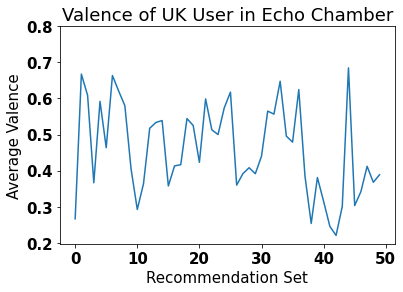

In [9]:
plt.plot(range(len(valence)), valence)
plt.title('Valence of UK User in Echo Chamber')
plt.yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.xlabel('Recommendation Set')
plt.ylabel('Average Valence')

In [10]:
len(valence.keys())

AttributeError: 'list' object has no attribute 'keys'

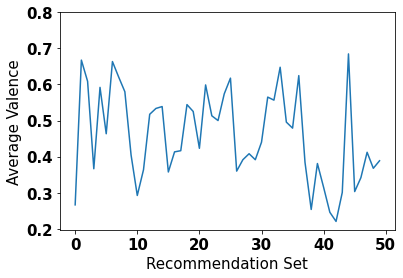

In [11]:
fig, ax = plt.subplots()
ax.plot(range(len(valence)), valence)
#ax.set_title('Valence of UK User in Echo Chamber')
ax.set_xlabel("Recommendation Set")
ax.set_ylabel("Average Valence")
ax.set_yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.show()

In [12]:
pride_party = get_playlist_tracks(spotify, "37i9dQZF1DX59HcpGmPXYR")
rainbow = get_playlist_tracks(spotify, '37i9dQZF1DWTSCHxQyDbKJ')

In [13]:
pride_tracks = (rainbow + pride_party)
# quick Way to remove duplicates in a list
pride_tracks = list(dict.fromkeys(pride_tracks))

In [43]:
pride_count = {}
for userid in uk_data['userID'].unique():
    user_history = uk_data[uk_data['userID'] == userid]
    user_history.reset_index(inplace = True)
    counter = 0
    for row in user_history.index:
        if user_history.loc[row]['trackName'] in pride_tracks:
            counter+= user_history.loc[row]['count']
    pride_count[userid] = counter

In [44]:
print(pride_count[375], pride_count[562])

287 262


In [27]:
sample_ids = []
for i in range(50):
    sample_ids.append(max(pride_count, key=pride_count.get))
    del pride_count[sample_ids[-1]]

In [29]:
t_explo, a_explo, predictions, model = simulate_model(uk_data, 50,sample_ids, decay = True, n_decay = 50)

100%|███████████████████████████████████████████| 50/50 [02:02<00:00,  2.46s/it]


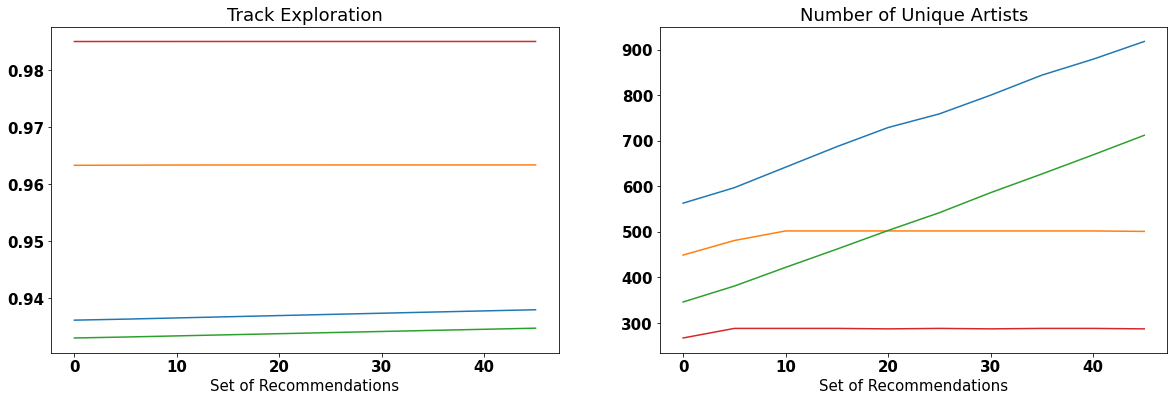

In [37]:
plot_exploratoryness(t_explo,a_explo, "", h_lim = 4)

In [47]:
red_user = uk_data[uk_data['userID'] == 562]

In [52]:
len(red_user['recordingMBID'].unique())

2565

In [45]:
counter = 0
for prediction_set in predictions[156]:
    for track_name in prediction_set['trackName']:
        if track_name in pride_tracks:
            counter+=1
print(counter)

0


In [46]:
counter = 0
for prediction_set in predictions[287]:
    for track_name in prediction_set['trackName']:
        if track_name in pride_tracks:
            counter+=1
print(counter)

2


In [40]:
t_explo[562]

[0.9849841438769944,
 0.984989940140701,
 0.984989940140701,
 0.984990438395723,
 0.9849913606488957,
 0.9849924241657573,
 0.9849923665308531,
 0.9849923665308531,
 0.9849923665308531,
 0.9849926257090004]

In [28]:
#sample_ids

[156,
 375,
 287,
 562,
 88,
 91,
 703,
 282,
 775,
 361,
 625,
 540,
 802,
 372,
 620,
 399,
 353,
 440,
 34,
 500,
 666,
 555,
 769,
 309,
 393,
 771,
 388,
 159,
 103,
 726,
 203,
 269,
 661,
 68,
 33,
 251,
 64,
 776,
 576,
 93,
 336,
 785,
 815,
 376,
 566,
 99,
 118,
 344,
 406,
 41]